In [3]:
global_node_id = 5
IP = "172.20.0.1"+str(global_node_id)
IP

'172.20.0.15'

In [30]:
import yaml
with open('neighbours.yml') as f:
    my_dict = yaml.safe_load(f)
my_dict[1]

'2 3'

In [38]:
global_node_id = 3
neighbours = {} #dictionary with node name and IP
#read initialization file
with open("neighbours.yml", 'r') as f:
    dict_nb = yaml.safe_load(f)
neighbours_node = dict_nb[global_node_id]
with open("ip_configuration.yml",'r') as file_ip:
    dict_ip = yaml.safe_load(file_ip)
for nb in neighbours_node:
    neighbours[nb]=str(dict_ip.get(nb))
neighbours

{1: [2, 3], 2: [1, 3], 3: [1, 2]}


{1: '172.20.0.11', 2: '172.20.0.12'}

In [41]:
PORT = 50500
ip = neighbours[1]+':'+str(PORT)
ip

'172.20.0.11:50500'

C:\Users\Thoma\AppData\Local\Temp\ipykernel_7736\3148758644.py:8: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


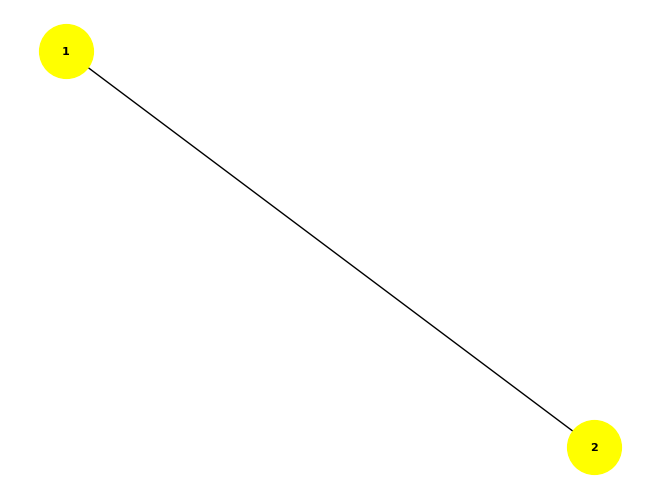

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

G = nx.Graph()
G.add_edge(1,2)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=1500, node_color='yellow', font_size=8, font_weight='bold',with_labels=True)
plt.tight_layout()
plt.show()


In [21]:
import numpy as np
arr = np.empty((0,2), int)
arr = np.append(arr, np.array([[1,2]]), axis=0)
arr = np.append(arr, np.array([[4,5]]), axis=0)

In [22]:
arr

array([[1, 2],
       [4, 5]])

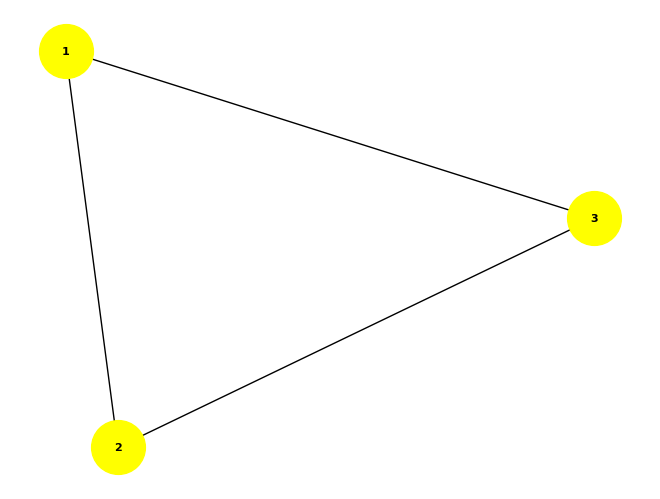

In [24]:
ad_list= [[1,2], [2,3], [1,3]]
G = nx.from_edgelist(ad_list)
pos = nx.spring_layout(G)
nx.draw(G, pos, node_size=1500, node_color='yellow', font_size=8, font_weight='bold',with_labels=True)
plt.savefig("input_graph.png")


In [74]:
import yaml
ad_list= [[1,2], [2,3], [1,3]]
def get_neigbours(ad_list):
    neighbours = {}
    vertices = np.unique(ad_list)
    print(vertices)
    for vertix in vertices:
        neighbours_v = []
        for edge in ad_list:
            if np.any(edge ==vertix):
                neighbour=int(edge[int(np.where(edge == vertix)[0])])
                neighbours_v.append(neighbour)
        neighbours[vertix] = neighbours_v
    return neighbours
dict_nb=get_neigbours(ad_list)
#dict_nb = {1: [2,3],2: [1,3],3: [1,2]}
y = yaml.round_trip_dump(dict_nb, explicit_start=True, default_flow_style=False)
print(y)

[1 2 3]


AttributeError: module 'yaml' has no attribute 'round_trip_dump'